# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ridhaka Gina Amalia
- **Email:** ginamalia2614@gmail.com
- **ID Dicoding:** ginardka

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah total sepeda yang disewa (cnt)? Apakah cuaca buruk menyebabkan penurunan signifikan pada penggunaan sepeda?
- Bagaimana pola penggunaan sepeda (cnt) berubah berdasarkan musim (season)? Musim mana yang memiliki jumlah penggunaan tertinggi dan terendah?
- Apakah terdapat perbedaan jumlah penyewaan sepeda pada hari kerja (workingday) dibandingkan akhir pekan? Bagaimana pola penggunaan berubah sepanjang minggu (weekday)?
- Pada jam berapa (hr) sepeda paling sering disewa? Apakah ada pola tertentu selama hari kerja (workingday) dibandingkan akhir pekan atau hari libur (holiday)?
- Bagaimana pola penggunaan antara pengguna kasual (casual) dan pengguna terdaftar (registered)? Apakah pengguna terdaftar lebih sering menyewa sepeda dibandingkan pengguna kasual?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- instant: indeks rekaman
- dteday : tanggal
- season : musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
- yr: tahun (0: 2011, 1:2012)
- mnth : bulan (1 sampai 12)
- hr : jam (0 sampai 23) (tidak berlaku untuk day.csv)
- holiday : hari libur atau tidak
- weekday : hari dalam seminggu
- workingday : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, selain itu nilainya 0.
- weathersit :
1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Bertebaran, Hujan Ringan + Awan Bertebaran
4: Hujan Lebat + Es Batu + Badai Petir + Kabut, Salju + Kabut
- temp : Suhu yang dinormalkan dalam Celcius. Nilainya diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)
- atemp: Suhu perasaan yang dinormalkan dalam Celcius. Nilainya diturunkan melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala per jam)
- hum: Kelembaban yang dinormalkan. Nilai dibagi menjadi 100 (maks)
windspeed: Kecepatan angin yang dinormalkan. Nilai dibagi menjadi 67 (maks)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar.

### Assessing Data

#### Menilai tabel hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Menilai tabel day_df

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Kolom dteday pada kedua df memiliki data type object bukan date time
- Kedua df tidak memiliki missing value, duplicates data dan innacurate data

### Cleaning Data

#### Membersihkan tabel hour_df

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Membersihkan tabel day_df

In [14]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Data type kolom dteday yang sebelumnya object sudah berhasil diubah menjadi datetime pada kedua df

## Exploratory Data Analysis (EDA)

### Explore hour_df & day_df (karena data kedua df tidak jauh berbeda)

In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [50]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [58]:
hour_df.groupby(by= ["yr", "mnth"]).cnt.sum().sort_values(ascending=False)

yr  mnth
1   9       218573
    8       214503
    7       203607
    6       202830
    10      198841
    5       195865
    4       174224
    3       164875
    11      152664
0   6       143512
    7       141341
    8       136691
    5       135821
    9       127418
1   12      123713
0   10      123511
1   2       103137
0   11      102167
1   1        96744
0   4        94870
    12       87323
    3        64045
    2        48215
    1        38189
Name: cnt, dtype: int64

In [59]:
hour_df.groupby(by= ["season", "weathersit"]).cnt.sum().sort_values(ascending=False)

,,cnt
season,weathersit,
3,1,801941
2,1,664463
4,1,546491
1,1,325278
4,2,251452
3,2,212932
2,2,207363
1,2,124205
2,3,46763


In [66]:
hour_df.groupby(by= ["weekday", "hr"]).cnt.sum().sort_values(ascending=False)

,,cnt
weekday,hr,
2,17,56605
4,17,54844
2,18,53827
3,17,53367
1,17,52249
...,...,...
4,3,497
1,3,496
3,3,484


In [60]:
hour_df.groupby(by= ["holiday", "workingday"]).cnt.sum().sort_values(ascending=False)

holiday  workingday
0        1             2292410
         0              921834
1        0               78435
Name: cnt, dtype: int64

**Insight:**
- Rata-rata total penyewaan sepeda per jam adalah 189.46, dengan jumlah minimum 1 dan maksimum 977 serta Standar deviasi (std) untuk cnt: 181.39. Ini menunjukkan bahwa ada fluktuasi signifikan dalam jumlah penyewaan berdasarkan waktu dan faktor lainnya.
- Rata-rata pengguna kasual (casual): 35.67, rata-rata pengguna terdaftar (registered): 153.79, ini menunjukkan pengguna terdaftar mendominasi penyewaan sepeda, dengan lebih banyak sepeda disewa oleh pengguna terdaftar dibandingkan kasual.
- Rata-rata nilai season adalah 2.5, menunjukkan bahwa dataset relatif merata mencakup semua musim.
- Kolom weathersit memiliki nilai berkisar antara 1 (cuaca cerah) hingga 4 (cuaca buruk), dengan rata-rata 1.43, menunjukkan bahwa sebagian besar data diambil pada cuaca yang baik (kategori 1).
- Kolom temp: Rata-rata suhu normalisasi adalah 0.496, menunjukkan suhu mendekati nilai tengah rentang.
- Kolom hum: Rata-rata kelembapan adalah 0.627, menunjukkan tingkat kelembapan sedang.
- Kolom windspeed: Rata-rata kecepatan angin adalah 0.19, menunjukkan kecepatan angin umumnya rendah.
- Terjadi penaikan penyewaan sepeda dari tahun 2011 ke 2012
- Penyewaan sepeda paling banyak dilakukan di akhir tahun 2012 saat terjadinya musim gugur (season 3) ketika cuaca cenderung cerah
- Penyewaan paling banyak dilakukan pada working day di jam pulang  atau rush hour


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah total sepeda yang disewa (cnt)? Apakah cuaca buruk menyebabkan penurunan signifikan pada penggunaan sepeda?

<ipython-input-82-7e5c90c17935>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_counts, x='weathersit', y='cnt', palette='cubehelix')


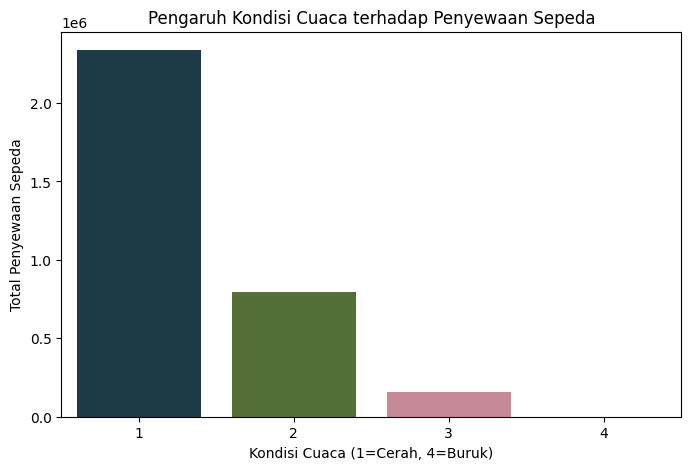

In [82]:
# Kelompokkan data berdasarkan weathersit
weather_counts = hour_df.groupby('weathersit')['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_counts, x='weathersit', y='cnt', palette='cubehelix')
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1=Cerah, 4=Buruk)')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

**Insight:**
- Cuaca buruk menyebabkan penurunan signifikan pada penyewaan sepeda


### Pertanyaan 2: Bagaimana pola penggunaan sepeda (cnt) berubah berdasarkan musim (season)? Musim mana yang memiliki jumlah penggunaan tertinggi dan terendah?

<ipython-input-83-3e522920d03e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='season', y='cnt', palette='cubehelix')


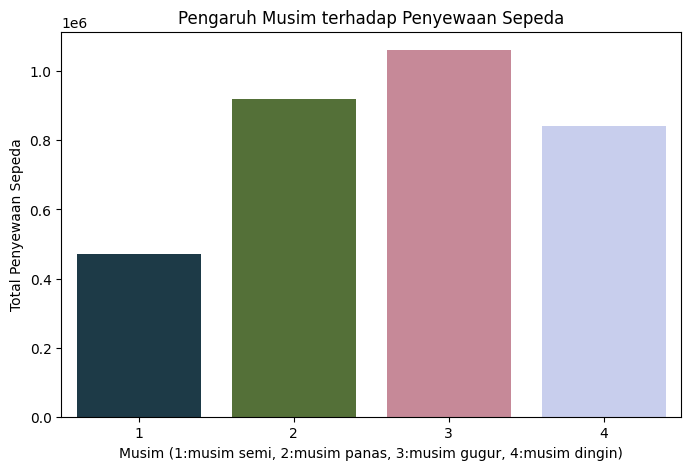

In [83]:
# Kelompokkan data berdasarkan season
season_counts = hour_df.groupby('season')['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=season_counts, x='season', y='cnt', palette='cubehelix')
plt.title('Pengaruh Musim terhadap Penyewaan Sepeda')
plt.xlabel('Musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

**Insight:**
- Penyewaan sepeda paling banyak dilakukan di musim gugur dan paling sedikit di musim semi

### Pertanyaan 3: Apakah terdapat perbedaan jumlah penyewaan sepeda pada hari kerja (workingday) dibandingkan akhir pekan? Bagaimana pola penggunaan berubah sepanjang minggu (weekday)?

<ipython-input-84-3abe994600eb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_counts, x='weekday', y='cnt', palette='cubehelix')


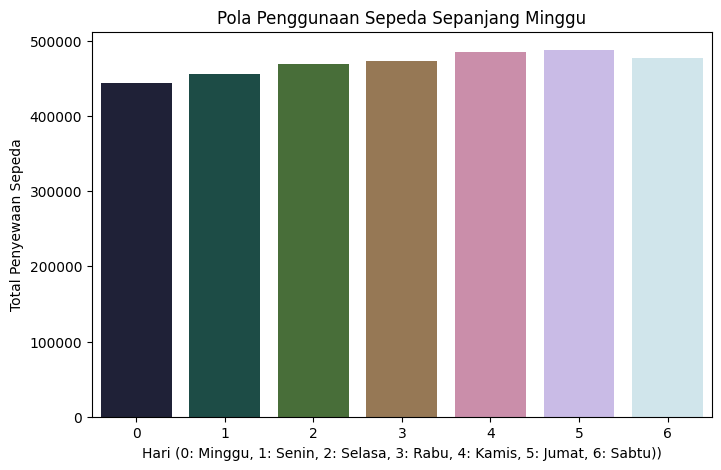

In [84]:
# Kelompokkan data berdasarkan weekday
weekday_counts = hour_df.groupby('weekday')['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_counts, x='weekday', y='cnt', palette='cubehelix')
plt.title('Pola Penggunaan Sepeda Sepanjang Minggu')
plt.xlabel('Hari (0: Minggu, 1: Senin, 2: Selasa, 3: Rabu, 4: Kamis, 5: Jumat, 6: Sabtu))')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

**Insight:**
- Jumlah penyewaan sepeda relatif stabil sepanjang minggu, dengan sedikit penurunan pada hari Minggu dan Sabtu. Hal ini menunjukkan bahwa sepeda digunakan baik untuk keperluan transportasi sehari-hari maupun rekreasi, tanpa perbedaan signifikan antara hari kerja dan akhir pekan.

### Pertanyaan 4: Pada jam berapa (hr) sepeda paling sering disewa? Apakah ada pola tertentu selama hari kerja (workingday) dibandingkan akhir pekan atau hari libur (holiday)?

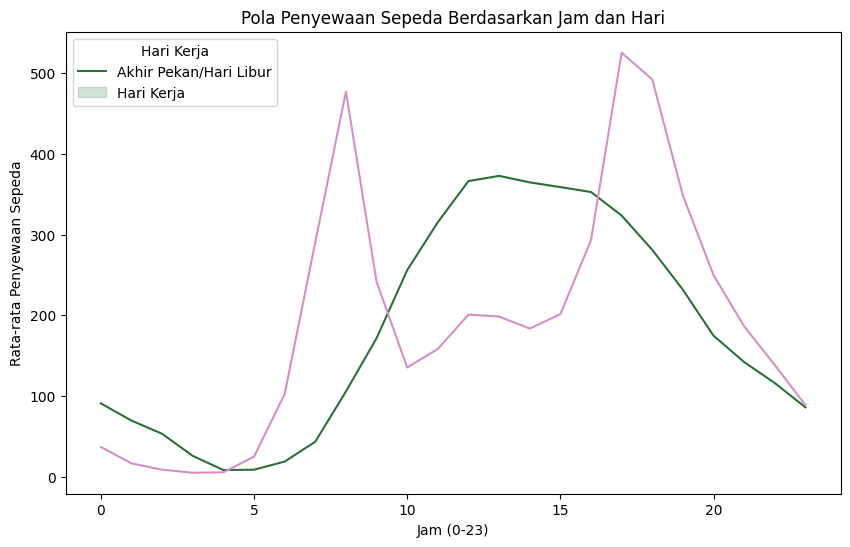

In [85]:
# Kelompokkan data berdasarkan jam dan workingday
hourly_counts = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts, x='hr', y='cnt', hue='workingday', palette='cubehelix')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam dan Hari')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend(title='Hari Kerja', labels=['Akhir Pekan/Hari Libur', 'Hari Kerja'])
plt.show()

**Insight:**
- Pada hari kerja, penyewaan sepeda paling banyak di jam berangkat dan pulang kerja atau rush hour. Sedangkan pada akhir pekan atau hari libur, penyewaan sepeda paling banyak di jam siang hingga sore

### Pertanyaan 5: Bagaimana pola penggunaan antara pengguna kasual (casual) dan pengguna terdaftar (registered)? Apakah pengguna terdaftar lebih sering menyewa sepeda dibandingkan pengguna kasual?

<ipython-input-96-ef2b17acad61>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_counts, x='User Type', y='Total Rentals', palette='cubehelix')


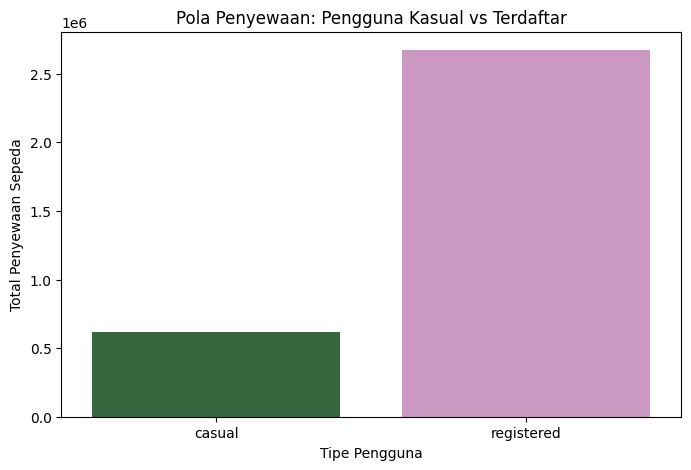

In [96]:
# Kelompokkan data berdasarkan jenis pengguna
user_counts = day_df[['casual', 'registered']].sum().reset_index()
user_counts.columns = ['User Type', 'Total Rentals']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=user_counts, x='User Type', y='Total Rentals', palette='cubehelix')
plt.title('Pola Penyewaan: Pengguna Kasual vs Terdaftar')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

**Insight:**
- Pengguna terdaftar lebih sering menyewa sepeda dibanding pengguna kasual

## Analisis Lanjutan (Opsional)

### Clustering Berdasarkan Hari (Weekday)

In [113]:
# Tambahkan label manual
hour_df['cluster'] = hour_df['weekday'].apply(lambda x: 'Hari Kerja' if x in [1, 2, 3, 4, 5] else 'Akhir Pekan')

# Hitung rata-rata penyewaan untuk setiap cluster
hour_df.groupby('cluster')['cnt'].mean()

,cnt
cluster,
Akhir Pekan,183.852014
Hari Kerja,191.738374


### Clustering Berdasarkan Jam (Time of Day)

In [108]:
# Kategorikan jam ke dalam waktu
def categorize_time(hr):
    if 6 <= hr <= 11:
        return 'Pagi'
    elif 12 <= hr <= 17:
        return 'Siang'
    elif 18 <= hr <= 23:
        return 'Sore/Malam'
    else:
        return 'Dini Hari'

hour_df['time_cluster'] = hour_df['hr'].apply(categorize_time)

# Hitung rata-rata penyewaan untuk setiap cluster waktu
hour_df.groupby('time_cluster')['cnt'].mean().sort_values(ascending=False)

,cnt
time_cluster,
Siang,295.483886
Sore/Malam,225.757555
Pagi,208.100688
Dini Hari,24.908559


**Insight:**
- Jumlah penyeweaan sepeda paling banyak di hari kerja, namun tidak banyak berbeda dengan jumlah penyewaan pada akhir pekan
- Waktu puncak penyewaan berada di siang hari

## Conclusion

- Cuaca buruk menyebabkan penurunan signifikan pada penyewaan sepeda
- Penyewaan sepeda paling banyak dilakukan di musim gugur dan paling sedikit di musim semi
- Jumlah penyewaan sepeda relatif stabil sepanjang minggu, dengan sedikit penurunan pada hari Minggu dan Sabtu. Hal ini menunjukkan bahwa sepeda digunakan baik untuk keperluan transportasi sehari-hari maupun rekreasi, tanpa perbedaan signifikan antara hari kerja dan akhir pekan.
- Pada hari kerja, penyewaan sepeda paling banyak di jam berangkat dan pulang kerja atau rush hour. Sedangkan pada akhir pekan atau hari libur, penyewaan sepeda paling banyak di jam siang hingga sore
- Pengguna terdaftar lebih sering menyewa sepeda dibanding pengguna kasual

In [114]:
main_data = hour_df.merge(day_df[['dteday', 'cnt']], on='dteday', how='left')
main_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_x,cluster,time_cluster,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Akhir Pekan,Dini Hari,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Akhir Pekan,Dini Hari,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Akhir Pekan,Dini Hari,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Akhir Pekan,Dini Hari,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Akhir Pekan,Dini Hari,985


In [115]:
main_data.to_csv("main_data.csv", index=False)